1.	What does R-squared represent in a regression model?
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1.
________________________________________
2.	What are the assumptions of linear regression?
o	Linearity
o	Independence of errors
o	Homoscedasticity (constant variance of errors)
o	Normality of residuals
o	No multicollinearity (in multiple regression)
________________________________________
3.	What is the difference between R-squared and Adjusted R-squared?
o	R-squared increases with the addition of variables, regardless of their significance.
o	Adjusted R-squared penalizes irrelevant variables and adjusts for the number of predictors, making it more reliable for model comparison.
________________________________________
4.	Why do we use Mean Squared Error (MSE)?
MSE is used to measure the average of the squares of the errors. It penalizes larger errors more than smaller ones, making it useful for emphasizing larger deviations.
________________________________________
5.	What does an Adjusted R-squared value of 0.85 indicate?
It means that 85% of the variance in the dependent variable is explained by the model, after adjusting for the number of predictors. This indicates a strong fit.
________________________________________
6.	How do we check for normality of residuals in linear regression?
o	Histogram or Q-Q plot of residuals
o	Shapiro-Wilk or Kolmogorov-Smirnov test
o	Skewness/Kurtosis values near 0
________________________________________
7.	What is multicollinearity, and how does it impact regression?
Multicollinearity occurs when independent variables are highly correlated. It can inflate standard errors, making coefficients unstable and interpretations unreliable.
________________________________________
8.	What is Mean Absolute Error (MAE)?
MAE is the average of the absolute differences between predicted and actual values. It gives a linear score without exaggerating large errors.
________________________________________
9.	What are the benefits of using an ML pipeline?
o	Automation and reproducibility
o	Easy experimentation and tuning
o	Cleaner code structure
o	Reduces human error and improves deployment
________________________________________
10.	Why is RMSE considered more interpretable than MSE?
RMSE is in the same units as the target variable, making it easier to interpret than MSE, which is in squared units.
11. What is pickling in Python, and how is it useful in ML?
Pickling is the process of converting a Python object into a byte stream using the pickle module.
In ML, it is useful for saving trained models or data preprocessing pipelines so they can be reused without retraining.
________________________________________
12. What does a high R-squared value mean?
A high R-squared value (close to 1) indicates that the model explains a large portion of the variance in the target variable, suggesting a good fit.
________________________________________
13. What happens if linear regression assumptions are violated?
Violating assumptions can lead to:
•	Biased or inefficient estimates
•	Invalid hypothesis tests
•	Over- or underestimation of effect sizes
•	Poor model generalization
________________________________________
14. How can we address multicollinearity in regression?
•	Remove or combine correlated predictors
•	Use Principal Component Analysis (PCA)
•	Apply regularization techniques like Ridge or Lasso
•	Check Variance Inflation Factor (VIF) and remove high-VIF variables
________________________________________
15. How can feature selection improve model performance in regression analysis?
Feature selection:
•	Reduces overfitting
•	Improves model interpretability
•	Decreases training time
•	Enhances model accuracy by removing noise or irrelevant variables
16. How is Adjusted R-squared calculated?

Where:
•	R2R^2R2 = R-squared
•	nnn = number of observations
•	kkk = number of predictors
It adjusts for the number of predictors to avoid overestimating the model's explanatory power.
________________________________________
17. Why is MSE sensitive to outliers?
MSE squares the error, so large errors (common with outliers) become disproportionately large. This makes MSE highly sensitive to outliers.
________________________________________
18. What is the role of homoscedasticity in linear regression?
Homoscedasticity means constant variance of residuals across all levels of independent variables. It's essential because heteroscedasticity can lead to inefficient estimates and invalid hypothesis testing.
________________________________________
19. What is Root Mean Squared Error (RMSE)?
RMSE is the square root of the Mean Squared Error. It measures the average magnitude of prediction errors in the same units as the dependent variable, making it interpretable.
________________________________________
20. Why is pickling considered risky?
Pickled files can execute arbitrary code when loaded, making them a security risk if the file source isn't trusted. It’s unsafe for untrusted data.
________________________________________

21. What alternatives exist to pickling for saving ML models?
•	Joblib: Faster and more efficient for NumPy arrays
•	ONNX: Platform-independent format
•	HDF5 (via Keras or TensorFlow)
•	PMML: Predictive Model Markup Language
•	Cloud model registries (like MLflow or AWS SageMaker)
________________________________________
22. What is heteroscedasticity, and why is it a problem?
Heteroscedasticity means the variance of errors differs across values of predictors. It:
•	Violates regression assumptions
•	Leads to inefficient estimates
•	Distorts confidence intervals and p-values
________________________________________
23. How can interaction terms enhance a regression model's predictive power?
Interaction terms model the combined effect of two or more variables. They capture relationships that linear terms alone miss, helping explain more complex patterns in the data.





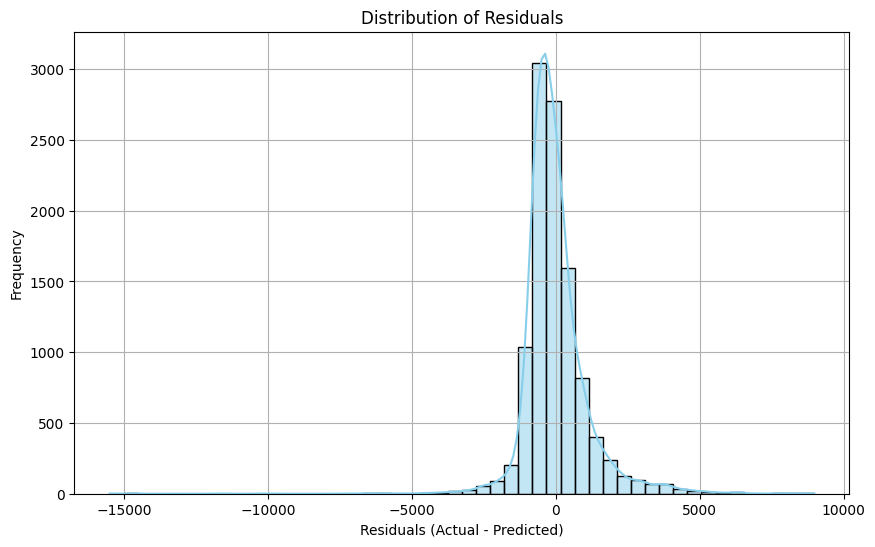

In [2]:
#1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Drop rows with missing values (if any)
diamonds.dropna(inplace=True)

# Encode categorical variables using one-hot encoding
diamonds_encoded = pd.get_dummies(diamonds, drop_first=True)

# Define features and target
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Drop rows with missing values (if any)
diamonds.dropna(inplace=True)

# One-hot encode categorical features
diamonds_encoded = pd.get_dummies(diamonds, drop_first=True)

# Split into features and target
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate errors
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 1288705.48
Mean Absolute Error (MAE): 737.15
Root Mean Squared Error (RMSE): 1135.21


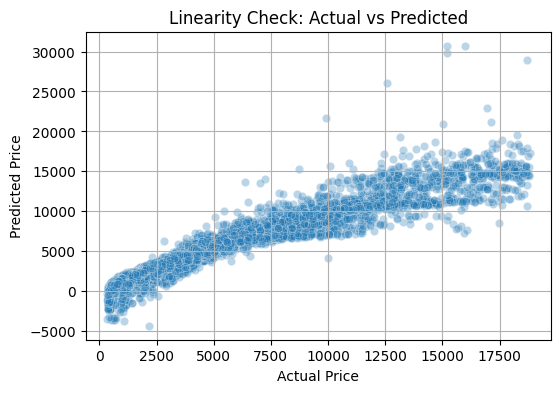

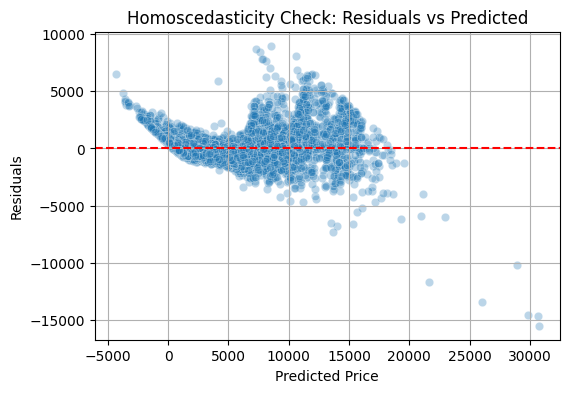

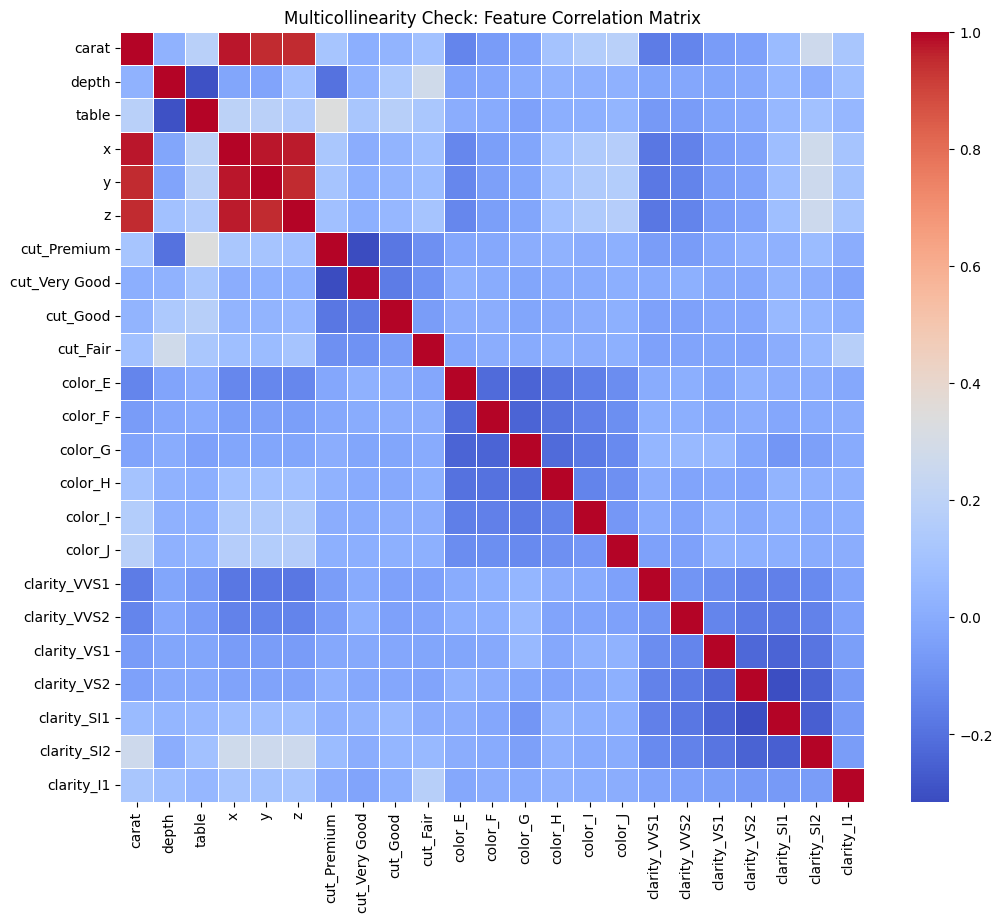

In [4]:
#3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess dataset
diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)
diamonds_encoded = pd.get_dummies(diamonds, drop_first=True)

# Features and target
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# 1. Linearity: Predicted vs Actual
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.title("Linearity Check: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

# 2. Homoscedasticity: Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# 3. Multicollinearity: Correlation Matrix
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Multicollinearity Check: Feature Correlation Matrix")
plt.show()


In [5]:
#4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
diamonds = sns.load_dataset('diamonds').dropna()

# Split features and target
X = diamonds.drop('price', axis=1)
y = diamonds['price']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor: OneHotEncode categorical, scale numeric
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{name}:")
    print(f"  MSE  = {mse:.2f}")
    print(f"  MAE  = {mae:.2f}")
    print(f"  RMSE = {rmse:.2f}")



Linear Regression:
  MSE  = 2242178.90
  MAE  = 888.48
  RMSE = 1497.39

Ridge Regression:
  MSE  = 2242190.28
  MAE  = 888.64
  RMSE = 1497.39

Lasso Regression:
  MSE  = 2242223.86
  MAE  = 888.68
  RMSE = 1497.41

Random Forest:
  MSE  = 1901096.41
  MAE  = 787.66
  RMSE = 1378.80


In [6]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
diamonds = sns.load_dataset('diamonds').dropna()

# Use only 'carat' to predict 'price'
X = diamonds[['carat']]  # Feature
y = diamonds['price']    # Target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2:.4f}")


Coefficient (slope): 7768.9105
Intercept: -2261.91
R-squared Score: 0.8489


Coefficient (slope): 0.1070
Intercept: 0.93
R-squared Score: 0.5449


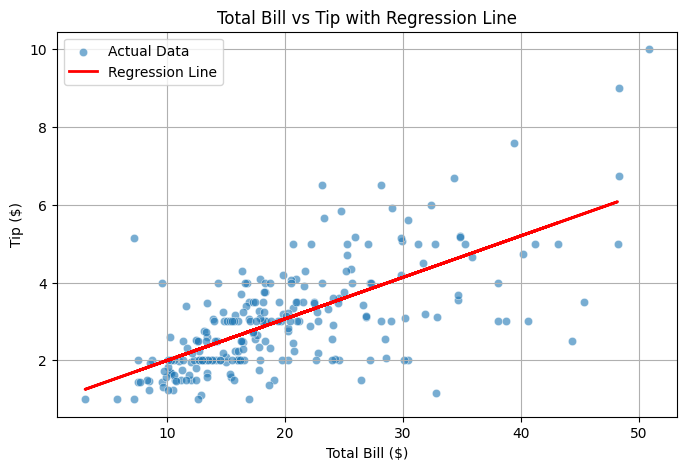

In [7]:
#6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load dataset
tips = sns.load_dataset('tips')

# Features and target
X = tips[['total_bill']]
y = tips['tip']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print model parameters
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=tips, label='Actual Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Total Bill vs Tip with Regression Line")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.grid(True)
plt.show()


Coefficient (slope): 2.7701
Intercept: 4.2151


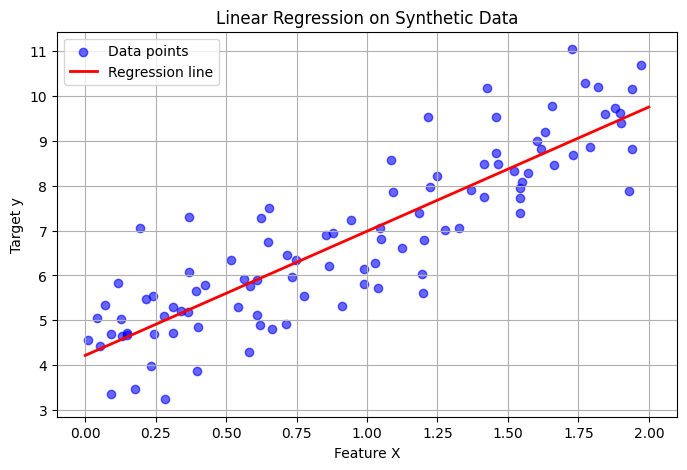

In [8]:
#7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = model.predict(X_new)

# Print model parameters
print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

# Plot data and regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X_new, y_pred, color='red', linewidth=2, label='Regression line')
plt.title("Linear Regression on Synthetic Data")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#8. Write a Python script that pickles a trained linear regression model and saves it to a file.
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (with noise)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save (pickle) the trained model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model pickled and saved successfully to 'linear_regression_model.pkl'.")

# Example of loading the pickled model and making predictions
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Making predictions with the loaded model
y_pred = loaded_model.predict(X_test)

# Print model parameters and predictions
print(f"Coefficient (slope) of the loaded model: {loaded_model.coef_[0][0]:.4f}")
print(f"Intercept of the loaded model: {loaded_model.intercept_[0]:.4f}")
print(f"Predictions on test data: {y_pred[:5]}")


Model pickled and saved successfully to 'linear_regression_model.pkl'.
Coefficient (slope) of the loaded model: 2.7993
Intercept of the loaded model: 4.1429
Predictions on test data: [[4.49875411]
 [9.15273606]
 [8.46643942]
 [7.85214193]
 [5.59173117]]


Coefficients: [[0.         1.63887939 2.5810637 ]]
Intercept: [4.56140272]


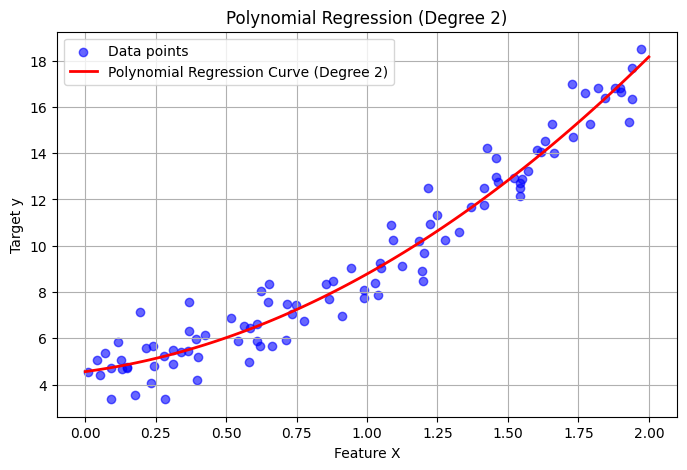

In [10]:
#9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Quadratic relationship with noise

# Transform the feature to include polynomial terms
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values for the regression curve
X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Print model parameters
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plot the data points and regression curve
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X_new, y_new, color='red', linewidth=2, label='Polynomial Regression Curve (Degree 2)')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data for simple linear regression
np.random.seed(42)

# Generate random values for X (features) and y (target)
X = np.random.rand(100, 1) * 10  # X between 0 and 10
y = 3 * X + 7 + np.random.randn(100, 1) * 2  # y = 3X + 7 + noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters (coefficient and intercept)
print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.2f}")


Coefficient (slope): 2.9080
Intercept: 7.43


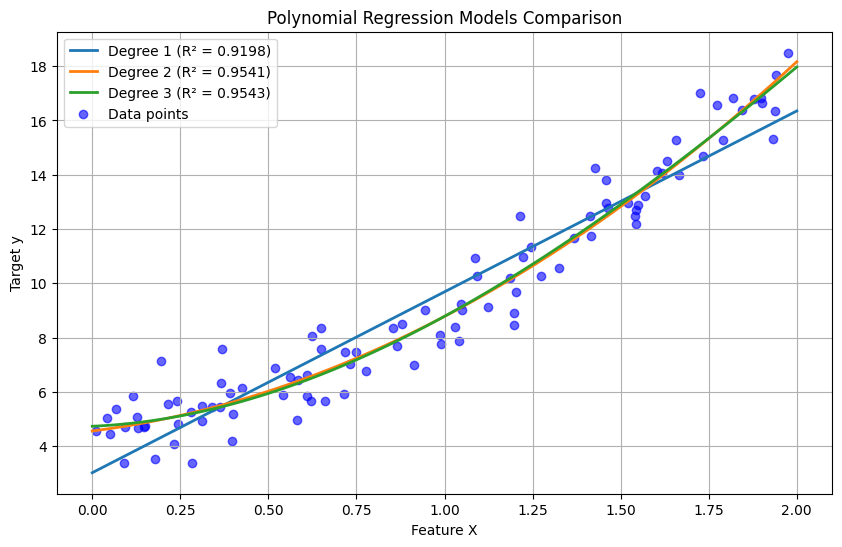

In [12]:
#11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data with a quadratic relationship
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature (X)
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Target (y = 4 + 3X + 2X^2 + noise)

# Prepare plot
plt.figure(figsize=(10, 6))

# Iterate over different polynomial degrees and fit models
degrees = [1, 2, 3]
for degree in degrees:
    # Transform the feature to include polynomial terms
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict using the model
    X_new = np.linspace(0, 2, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = model.predict(X_new_poly)

    # Calculate R² score for performance comparison
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    # Plot the regression curve
    plt.plot(X_new, y_new, label=f"Degree {degree} (R² = {r2:.4f})", linewidth=2)

# Plot original data points
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)

# Set plot title and labels
plt.title("Polynomial Regression Models Comparison")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()



In [13]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)

# Generate two features (X1 and X2)
X1 = 2 * np.random.rand(100, 1)  # Feature 1
X2 = 3 * np.random.rand(100, 1)  # Feature 2
X = np.hstack([X1, X2])  # Combine them into a single feature matrix

# Generate target variable y (with linear relationship)
y = 4 + 3 * X1 + 5 * X2 + np.random.randn(100, 1)  # y = 4 + 3*X1 + 5*X2 + noise

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the model's coefficients, intercept, and R-squared score
coefficients = model.coef_
intercept = model.intercept_
r2 = model.score(X, y)  # R-squared score

# Print the results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept[0]:.2f}")
print(f"R-squared score: {r2:.4f}")


Coefficients: [[2.82913734 5.23977047]]
Intercept: 3.91
R-squared score: 0.9610


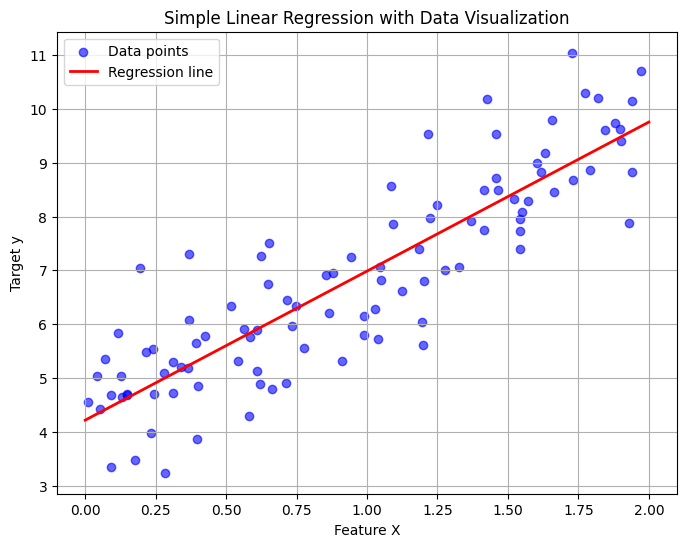

Coefficient (slope): 2.7701
Intercept: 4.22


In [14]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)

# Generate feature (X) and target (y) values
X = 2 * np.random.rand(100, 1)  # Feature X
y = 4 + 3 * X + np.random.randn(100, 1)  # Target y = 4 + 3*X + noise

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
X_new = np.linspace(0, 2, 100).reshape(100, 1)  # New values for X (for the line)
y_new = model.predict(X_new)

# Plot the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X_new, y_new, color='red', linewidth=2, label='Regression line')
plt.title("Simple Linear Regression with Data Visualization")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()

# Print model parameters
print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.2f}")


In [15]:
#14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Generate synthetic dataset with multiple features
np.random.seed(42)

# Create a dataframe with multiple features
X1 = 2 * np.random.rand(100, 1)  # Feature 1
X2 = 3 * np.random.rand(100, 1)  # Feature 2
X3 = 0.5 * X1 + 2 * X2 + np.random.randn(100, 1)  # Feature 3 correlated with X1 and X2

# Combine features into a dataframe
X = np.hstack([X1, X2, X3])
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])

# Add constant term for intercept in the VIF calculation
df_with_const = add_constant(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF data
print(vif_data)


  Feature       VIF
0   const  6.636560
1      X1  1.041306
2      X2  5.061938
3      X3  5.073443


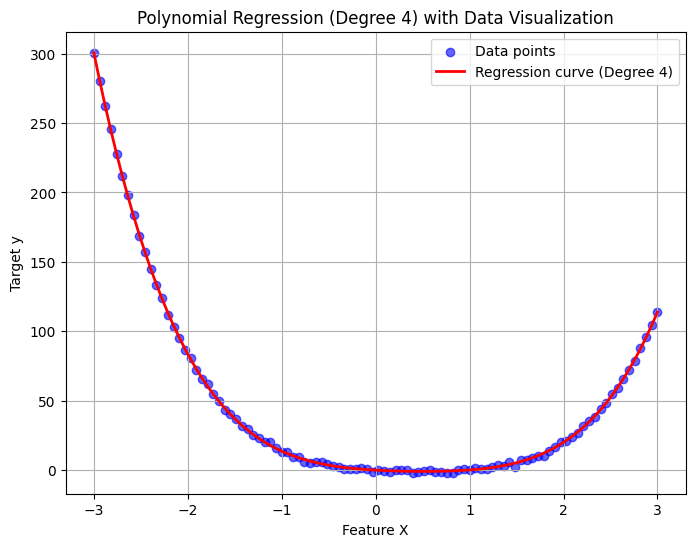

Model Coefficients: [[ 0.         -3.71678554  4.90227709 -3.04724198  2.01500916]]
Model Intercept: [-0.05779327]


In [16]:
#15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data for a polynomial relationship (degree 4)
np.random.seed(42)

# Generate feature (X) values
X = np.linspace(-3, 3, 100).reshape(100, 1)  # Feature X (range from -3 to 3)

# Generate target (y) with a polynomial relationship of degree 4
y = 2 * X**4 - 3 * X**3 + 5 * X**2 - 4 * X + np.random.randn(100, 1)  # Polynomial: y = 2X^4 - 3X^3 + 5X^2 - 4X + noise

# Fit the polynomial regression model (degree 4)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict values for the regression curve
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the data points and the regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X_new, y_new, color='red', linewidth=2, label='Regression curve (Degree 4)')
plt.title("Polynomial Regression (Degree 4) with Data Visualization")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


In [17]:
#16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Generate synthetic data with multiple features
np.random.seed(42)

# Create a dataset with multiple features
X1 = 2 * np.random.rand(100, 1)  # Feature 1
X2 = 3 * np.random.rand(100, 1)  # Feature 2
X3 = 0.5 * X1 + 2 * X2 + np.random.randn(100, 1)  # Feature 3 correlated with X1 and X2

# Combine features into a single feature matrix
X = np.hstack([X1, X2, X3])

# Create target variable y (with a linear relationship)
y = 4 + 3 * X1 + 5 * X2 + 2 * X3 + np.random.randn(100, 1)  # y = 4 + 3*X1 + 5*X2 + 2*X3 + noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standardization and linear regression
pipeline = make_pipeline(
    StandardScaler(),  # Standardize the features
    LinearRegression()  # Linear regression model
)

# Train the model using the training data
pipeline.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = pipeline.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared score: {r2:.4f}")


R-squared score: 0.9816


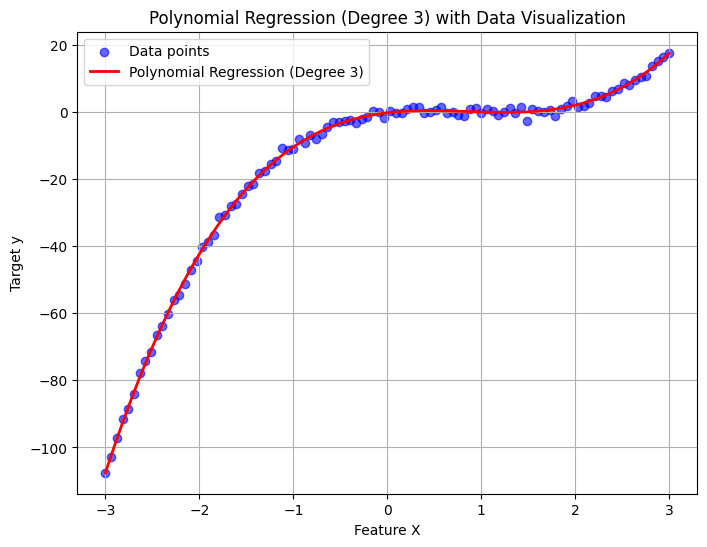

Model Coefficients: [[ 0.          3.28321446 -4.97963824  1.95275802]]
Model Intercept: [-0.16616584]


In [18]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data (feature X and target y)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(100, 1)  # Feature X (range from -3 to 3)
y = 2 * X**3 - 5 * X**2 + 3 * X + np.random.randn(100, 1)  # Polynomial relationship: y = 2X^3 - 5X^2 + 3X + noise

# Create polynomial features (degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values using the fitted model
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # New data points for prediction
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the original data points and the regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X_new, y_new, color='red', label='Polynomial Regression (Degree 3)', linewidth=2)
plt.title("Polynomial Regression (Degree 3) with Data Visualization")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


In [19]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data with 5 features
np.random.seed(42)

# Create 5 features (X1, X2, X3, X4, X5)
X1 = np.random.rand(100, 1)  # Feature 1
X2 = 2 * np.random.rand(100, 1)  # Feature 2
X3 = 3 * np.random.rand(100, 1)  # Feature 3
X4 = 0.5 * np.random.rand(100, 1)  # Feature 4
X5 = np.random.rand(100, 1)  # Feature 5

# Combine features into a single feature matrix
X = np.hstack([X1, X2, X3, X4, X5])

# Create a target variable y (linear relationship with all features)
y = 3 + 2 * X1 + 4 * X2 + 5 * X3 - 3 * X4 + 7 * X5 + np.random.randn(100, 1)  # y = 3 + 2*X1 + 4*X2 + 5*X3 - 3*X4 + 7*X5 + noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared score: {r2:.4f}")

# Print the model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


R-squared score: 0.9717
Model Coefficients: [[ 3.12053523  4.09735176  4.91455831 -4.81681748  7.20886247]]
Model Intercept: [2.89526396]


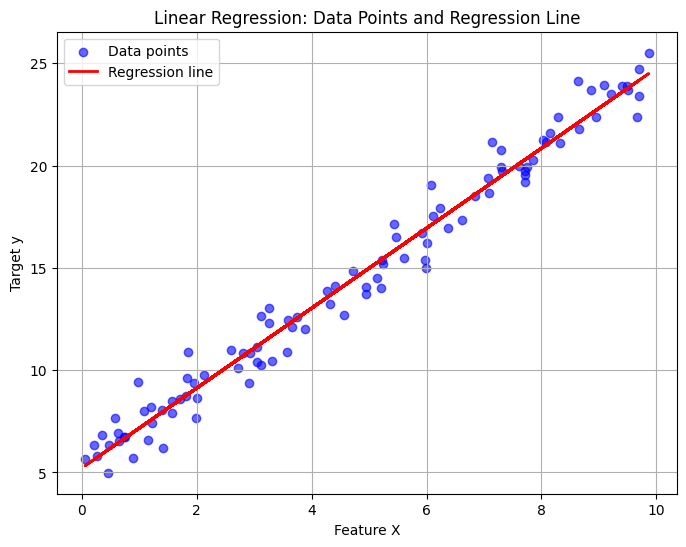

Model Coefficient (Slope): 1.9540
Model Intercept: 5.2151


In [20]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data for linear regression
np.random.seed(42)

# Create synthetic feature X (e.g., values between 0 and 10)
X = 10 * np.random.rand(100, 1)  # 100 data points, X values between 0 and 10

# Create target variable y with a linear relationship to X (y = 2 * X + 5 + noise)
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear relationship with some noise

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict y values using the fitted model
y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression line', linewidth=2)
plt.title("Linear Regression: Data Points and Regression Line")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.4f}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")


In [21]:
#20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data with 3 features
np.random.seed(42)

# Create 3 features (X1, X2, X3)
X1 = np.random.rand(100, 1)  # Feature 1
X2 = 2 * np.random.rand(100, 1)  # Feature 2
X3 = 3 * np.random.rand(100, 1)  # Feature 3

# Combine features into a single feature matrix
X = np.hstack([X1, X2, X3])

# Create a target variable y (linear relationship with all features)
y = 5 + 2 * X1 + 4 * X2 + 3 * X3 + np.random.randn(100, 1)  # y = 5 + 2*X1 + 4*X2 + 3*X3 + noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared score: {r2:.4f}")

# Print the model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


R-squared score: 0.8651
Model Coefficients: [[2.66403937 4.21038511 3.14173981]]
Model Intercept: [4.51441893]


In [22]:
#21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 data points
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear relation with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
r2_score = model.score(X_test, y_test)
print(f"R-squared score on the test set: {r2_score:.4f}")

# Serialize (save) the model to a file using joblib
joblib_file = "linear_regression_model.joblib"
joblib.dump(model, joblib_file)
print(f"Model serialized and saved to {joblib_file}")

# Deserialize (load) the model from the file
loaded_model = joblib.load(joblib_file)
print("Model deserialized from file.")

# Evaluate the loaded model
loaded_r2_score = loaded_model.score(X_test, y_test)
print(f"R-squared score on the test set (using the loaded model): {loaded_r2_score:.4f}")


R-squared score on the test set: 0.1491
Model serialized and saved to linear_regression_model.joblib
Model deserialized from file.
R-squared score on the test set (using the loaded model): 0.1491


In [23]:
#22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Seaborn 'tips' dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

# Define the feature columns and the target column
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# Create a column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time']),
        ('num', 'passthrough', ['total_bill'])
    ])

# Initialize the linear regression model
model = LinearRegression()

# Create a pipeline that first applies the preprocessing steps, then fits the linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Print the model's coefficients
print("Model Coefficients: ")
print(pipeline.named_steps['regressor'].coef_)


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Mean Squared Error: 0.6533
Model Coefficients: 
[-0.01142836  0.01142836  0.12948735 -0.12948735  0.06222575 -0.0614069
  0.12868034 -0.12949919 -0.09320812  0.09320812  0.1092622 ]


In [24]:
#23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3 + 2 * X[:, 0] + 4 * X[:, 1] - 5 * X[:, 2] + 6 * X[:, 3] + 7 * X[:, 4] + np.random.randn(100)  # Linear relation with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression and Ridge models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # Set regularization strength

# Fit the models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Calculate R-squared scores
lr_r2 = r2_score(y_test, lr_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Print the R-squared scores and coefficients for both models
print(f"Linear Regression R-squared: {lr_r2:.4f}")
print(f"Ridge Regression R-squared: {ridge_r2:.4f}")
print("\nLinear Regression Coefficients:")
print(lr_model.coef_)
print("\nRidge Regression Coefficients:")
print(ridge_model.coef_)


Linear Regression R-squared: 0.9109
Ridge Regression R-squared: 0.8987

Linear Regression Coefficients:
[ 1.65295867  3.76607667 -4.35209671  6.1455846   6.55435983]

Ridge Regression Coefficients:
[ 1.49674865  3.18177618 -3.9134055   5.55854784  5.87406929]


In [25]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Generate a synthetic dataset with 100 samples, 5 features, and some noise
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Perform 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')  # Use R-squared as the scoring metric

# Print the cross-validation scores for each fold
print("Cross-validation R-squared scores for each fold:")
print(cv_scores)

# Calculate and print the mean and standard deviation of the R-squared scores
print(f"\nMean R-squared score: {cv_scores.mean():.4f}")
print(f"Standard deviation of R-squared scores: {cv_scores.std():.4f}")


Cross-validation R-squared scores for each fold:
[0.99999931 0.99999901 0.99999977 0.99999917 0.99999934]

Mean R-squared score: 1.0000
Standard deviation of R-squared scores: 0.0000


Degree 1 Polynomial Regression R-squared: 0.8862
Degree 2 Polynomial Regression R-squared: 0.9969
Degree 3 Polynomial Regression R-squared: 0.9999
Degree 4 Polynomial Regression R-squared: 0.9998
Degree 5 Polynomial Regression R-squared: 0.9998


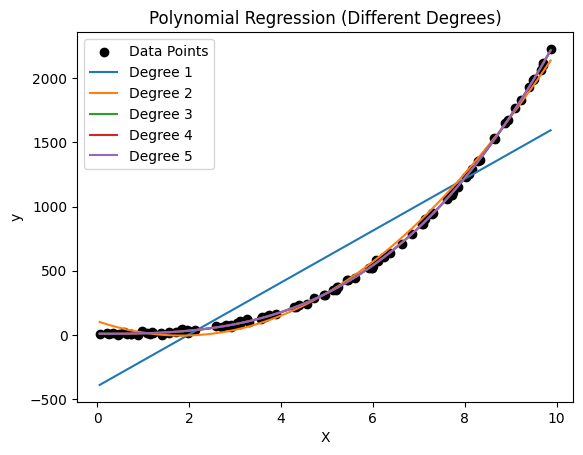

In [26]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 2 * X**3 + 3 * X**2 + 5 + np.random.randn(100, 1) * 10  # Polynomial relation with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
lr_model = LinearRegression()

# Degrees for polynomial regression
degrees = [1, 2, 3, 4, 5]

# Plot data points
plt.scatter(X, y, color='black', label='Data Points')

# Iterate over different polynomial degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit the linear regression model on the transformed data
    lr_model.fit(X_poly_train, y_train)

    # Make predictions
    y_pred = lr_model.predict(X_poly_test)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree} Polynomial Regression R-squared: {r2:.4f}")

    # Plot the regression curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = lr_model.predict(X_range_poly)
    plt.plot(X_range, y_range_pred, label=f'Degree {degree}')

# Customize the plot
plt.title("Polynomial Regression (Different Degrees)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
